## 1.4.9 Contours in OpenCV

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread("opencv.png")
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# imgray = 255-imgray

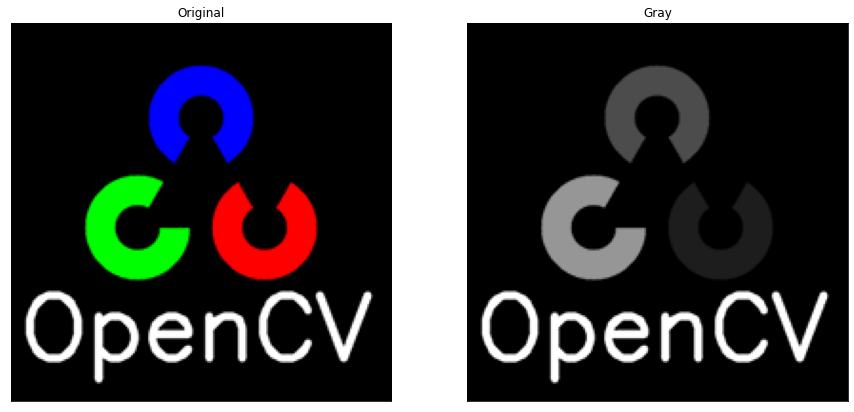

In [3]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original'),plt.xticks([]),plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgray,cmap = 'gray')
plt.title('Gray'),plt.xticks([]),plt.yticks([])
plt.show()

In [4]:
ret,thresh = cv2.threshold(imgray,8,255,cv2.THRESH_BINARY)

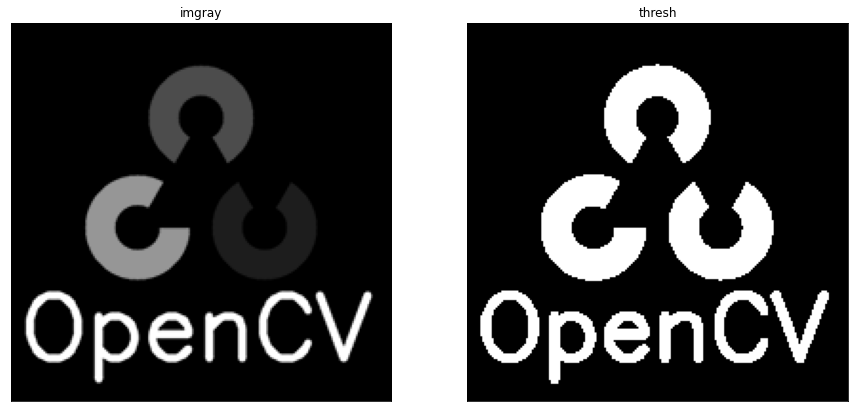

In [5]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgray,cmap = 'gray')
plt.title('imgray'),plt.xticks([]),plt.yticks([])
plt.subplot(1,2,2),plt.imshow(thresh,cmap = 'gray')
plt.title('thresh'),plt.xticks([]),plt.yticks([])
plt.show()

In [6]:
kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel)
closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel)

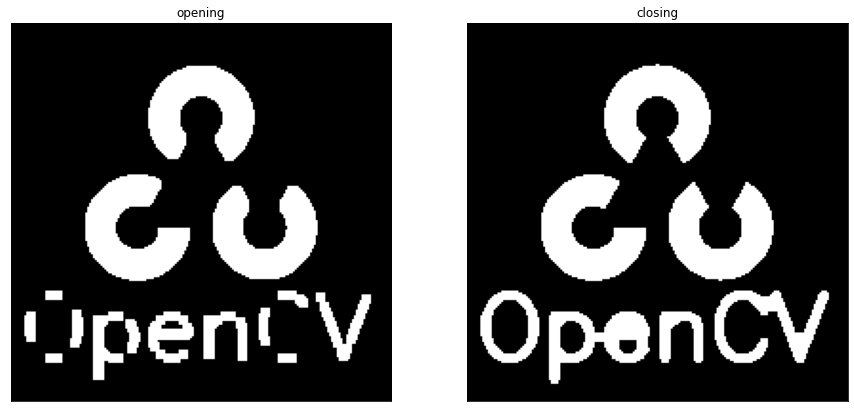

In [7]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(opening,cmap = 'gray')
plt.title('opening'),plt.xticks([]),plt.yticks([])
plt.subplot(1,2,2),plt.imshow(closing,cmap = 'gray')
plt.title('closing'),plt.xticks([]),plt.yticks([])
plt.show()

In [8]:
contours, hierarchy = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [10]:
imgcontour = cv2.drawContours(img, contours, -1, (255,32,255),3)
img = cv2.imread('opencv.png')

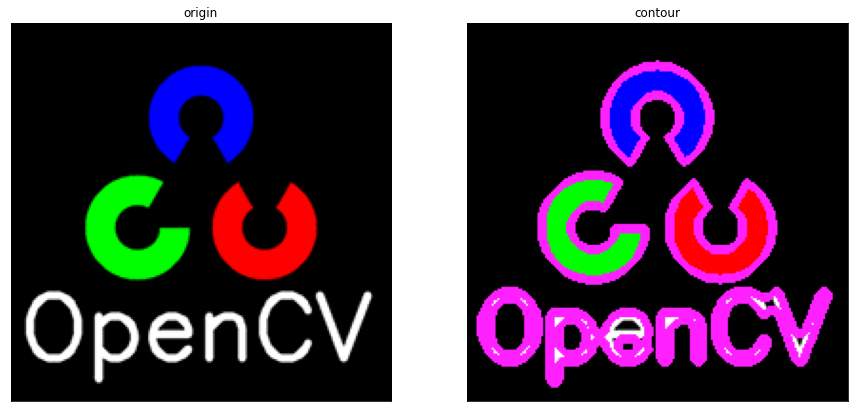

In [14]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('origin'),plt.xticks([]),plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgcontour,cmap = 'gray')
plt.title('contour'),plt.xticks([]),plt.yticks([])
plt.show()

In [15]:
cnt = contours[0]
epsilon = 0.01*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

In [16]:
imgcontour = cv2.imread('opencv.png')
imgcontour = cv2.drawContours(imgcontour, [cnt], -1, (255,32,255), 3)
imgapprox = cv2.imread('opencv.png')
imgapprox = cv2.drawContours(imgapprox, [approx], -1, (255,32,255), 3)
img = cv2.imread('opencv.png')

In [17]:
cnt.shape, approx.shape

((29, 1, 2), (10, 1, 2))

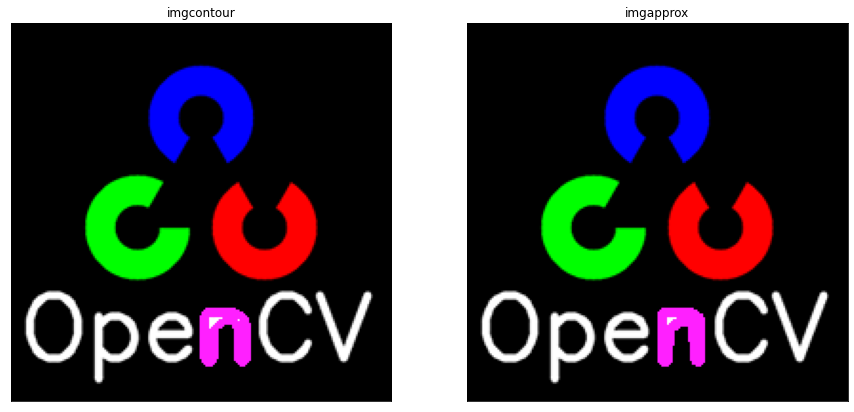

In [18]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgcontour)
plt.title('imgcontour'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgapprox,cmap = 'gray')
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.show()

In [19]:
hull = cv2.convexHull(approx)

In [21]:
imghull = cv2.imread('opencv.png')
imghull = cv2.drawContours(imghull, [hull], -1, (255,32,255), 3)

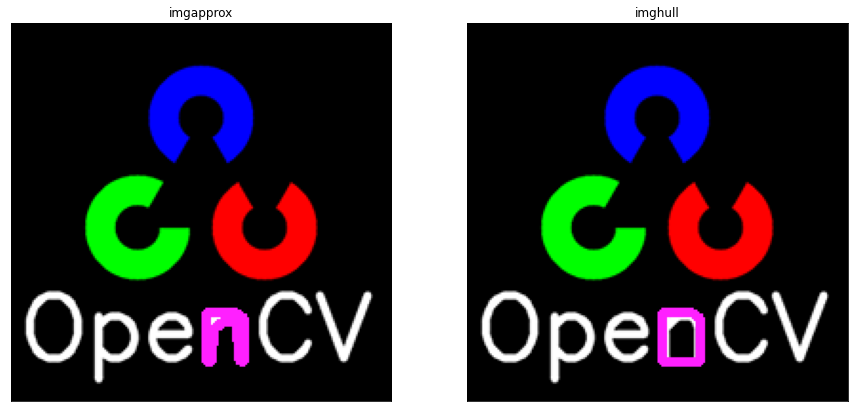

In [22]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgapprox)
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imghull,cmap = 'gray')
plt.title('imghull'), plt.xticks([]), plt.yticks([])
plt.show()

In [24]:
x,y,w,h = cv2.boundingRect(cnt)
imgbox = cv2.imread('opencv.png')
imgbox = cv2.rectangle(imgbox,(x,y),(x+w,y+h),(255,0,0),2)

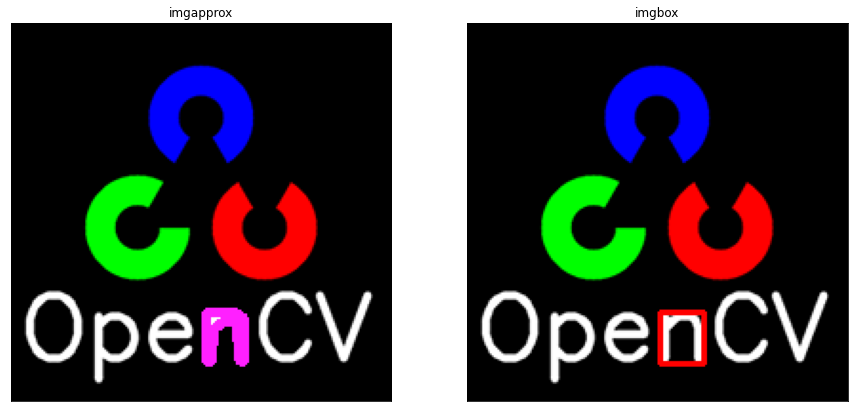

In [25]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgapprox)
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgbox,cmap = 'gray')
plt.title('imgbox'), plt.xticks([]), plt.yticks([])
plt.show()

In [27]:
imgcontour = cv2.imread('opencv.png')
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
imgcontour = cv2.drawContours(imgcontour,[box],0,(0,0,255),2)

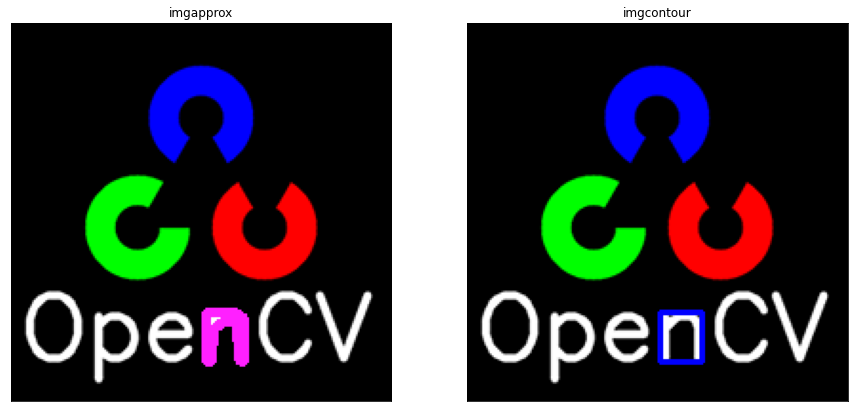

In [28]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgapprox)
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgcontour,cmap = 'gray')
plt.title('imgcontour'), plt.xticks([]), plt.yticks([])
plt.show()

In [29]:
cnt = contours[9]
M = cv2.moments(cnt)
print(M)

{'m00': 1606.0, 'm10': 159512.5, 'm01': 73662.66666666666, 'm20': 16262136.166666666, 'm11': 7317543.916666666, 'm02': 3649276.0, 'm30': 1698441841.25, 'm21': 747531623.0833334, 'm12': 362557252.0833333, 'm03': 192731863.0, 'mu20': 418899.7680053953, 'mu11': 1157.7917185556144, 'mu02': 270578.3284903839, 'mu30': 27461.565480709076, 'mu21': 1403553.1978270374, 'mu12': -5456.509983513504, 'mu03': 528597.744527638, 'nu20': 0.1624123453632763, 'nu11': 0.00044888940700099346, 'nu02': 0.10490638642232969, 'nu30': 0.0002656815759706484, 'nu21': 0.013578913620903379, 'nu12': -5.278993190456717e-05, 'nu03': 0.005114008592091626}


In [30]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

In [31]:
area = cv2.contourArea(cnt)

In [32]:
perimeter = cv2.arcLength(cnt,True)

In [34]:
imginfo = cv2.imread('opencv.png')
imginfo = cv2.circle(imginfo,(cx,cy), 5, (0,0,255), -1)
font = cv2.FONT_HERSHEY_SIMPLEX
msg = "A"+str(area)+"L"+str(perimeter)
imginfo=cv2.putText(imginfo,msg,(cx,cy), font, 1,(32,32,32),2,cv2.LINE_AA)

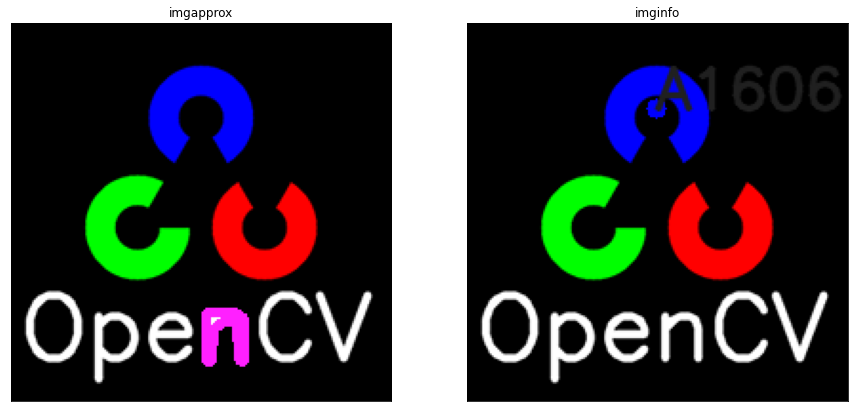

In [35]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgapprox)
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imginfo,cmap = 'gray')
plt.title('imginfo'), plt.xticks([]), plt.yticks([])
plt.show()